### Name: Drumil Kotecha; Roll Number: C052


# Aim: Use GMM to segment foreground of image of a given video

### Task1: Use GMM to generate background model
### Task2: Use background model to segment foreground from frames of video

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage.color import rgb2gray

In [ ]:
cap = cv2.VideoCapture('/content/sample_data/traffic.avi')

In [ ]:
cap

< cv2.VideoCapture 0x798994e403d0>

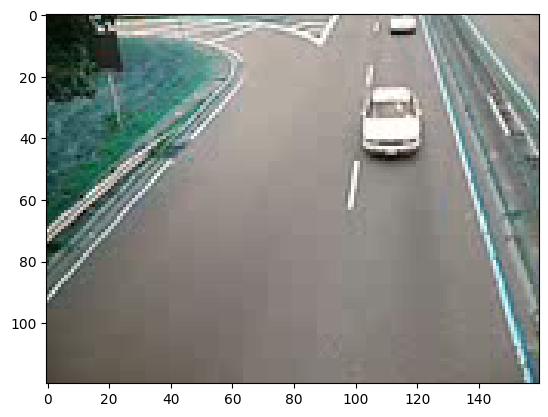

In [ ]:
r,f = cap.read()
plt.imshow(f)

In [ ]:
cap = cv2.VideoCapture('/content/sample_data/traffic.avi')
frames = []
while True:
  r,f = cap.read()
  if r == False:
    break
  frames.append(f)

In [ ]:
len(frames)

120

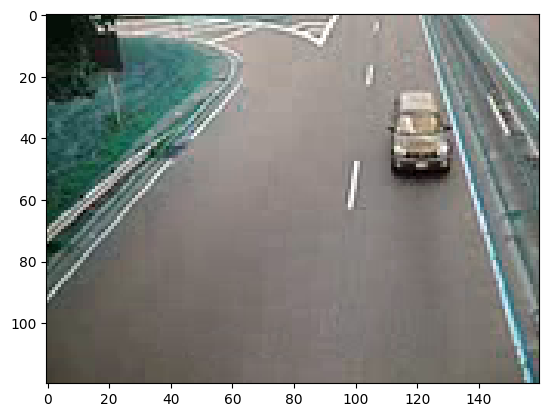

In [ ]:
plt.imshow(frames[110])

In [ ]:
frames = np.array(frames)
type(frames)

numpy.ndarray

In [ ]:
frames[0].shape

(120, 160, 3)

In [ ]:
rw, col, ch = frames[0].shape
print("Row:",rw,"Column:",col,"Channel:",ch)

Row: 120 Column: 160 Channel: 3


In [ ]:
gmm = GaussianMixture(n_components=3, random_state=0)
B = np.zeros((rw,col,ch))

In [ ]:
for r in range(rw):
  for c in range(col):
    for k in range(ch):
      temp = frames[:10,r,c,k]
      temp = temp.reshape(10,1)
      gmm.fit(temp)
      means = gmm.means_
      weights = gmm.weights_
      i = np.argmax(weights)
      B[r,c,k] = means[i][0]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/

In [ ]:
B = B/np.max(B)

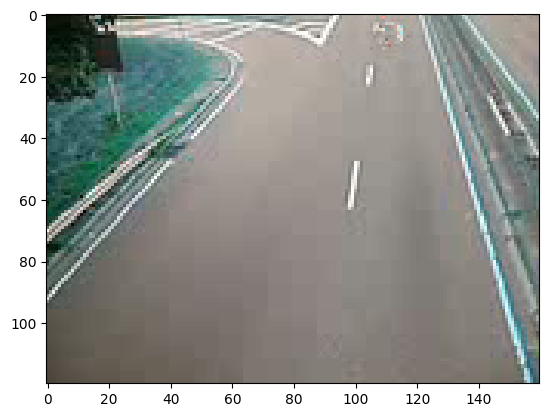

In [ ]:
plt.imshow(B)

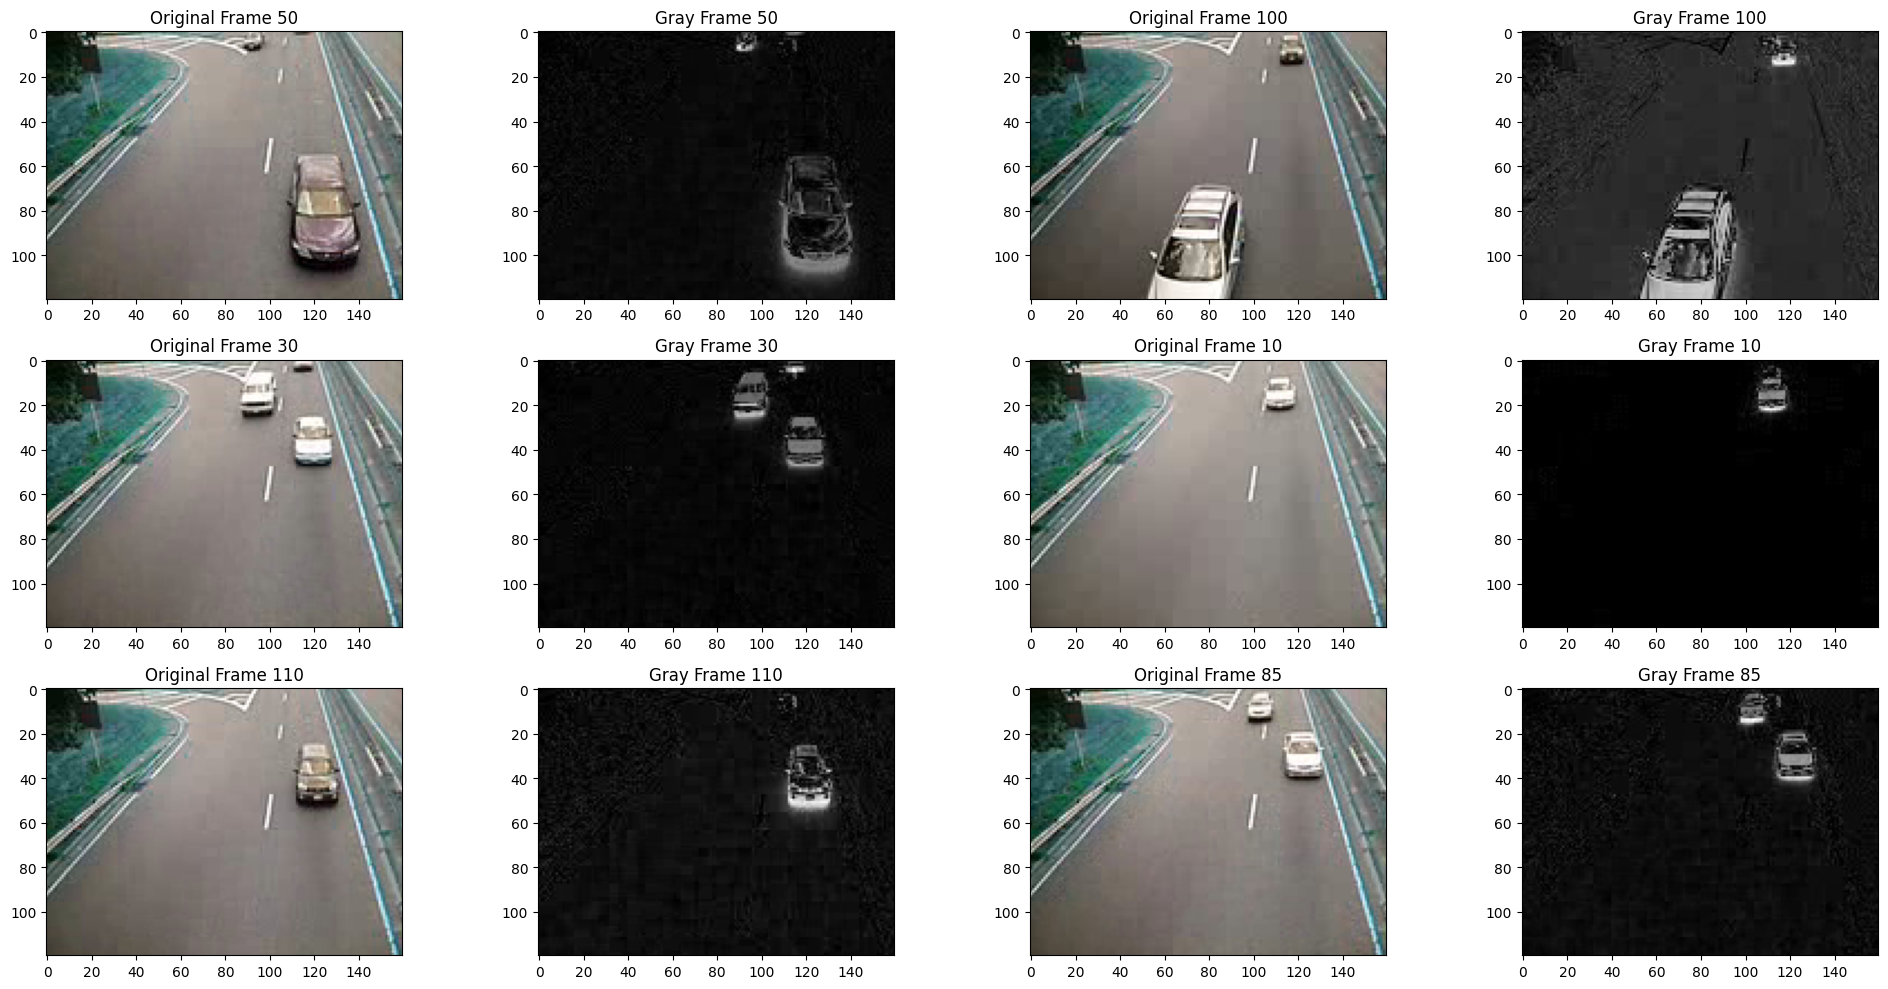

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))  # Adjusted for 3 rows, 4 columns

# Frame 50
axes[0, 0].imshow(frames[50])
axes[0, 0].set_title('Original Frame 50')
f1 = abs(rgb2gray(frames[50]) - rgb2gray(B))
axes[0, 1].imshow(f1, cmap='gray')
axes[0, 1].set_title('Gray Frame 50')

# Frame 100
axes[0, 2].imshow(frames[100])
axes[0, 2].set_title('Original Frame 100')
f2 = abs(rgb2gray(frames[100]) - rgb2gray(B))
axes[0, 3].imshow(f2, cmap='gray')
axes[0, 3].set_title('Gray Frame 100')

# Frame 30
axes[1, 0].imshow(frames[30])
axes[1, 0].set_title('Original Frame 30')
f3 = abs(rgb2gray(frames[30]) - rgb2gray(B))
axes[1, 1].imshow(f3, cmap='gray')
axes[1, 1].set_title('Gray Frame 30')

# Frame 10
axes[1, 2].imshow(frames[10])
axes[1, 2].set_title('Original Frame 10')
f4 = abs(rgb2gray(frames[10]) - rgb2gray(B))
axes[1, 3].imshow(f4, cmap='gray')
axes[1, 3].set_title('Gray Frame 10')

# Frame 110
axes[2, 0].imshow(frames[110])
axes[2, 0].set_title('Original Frame 110')
f5 = abs(rgb2gray(frames[110]) - rgb2gray(B))
axes[2, 1].imshow(f5, cmap='gray')
axes[2, 1].set_title('Gray Frame 110')

# Frame 85
axes[2, 2].imshow(frames[85])
axes[2, 2].set_title('Original Frame 85')
f6 = abs(rgb2gray(frames[85]) - rgb2gray(B))
axes[2, 3].imshow(f6, cmap='gray')
axes[2, 3].set_title('Gray Frame 85')

plt.tight_layout()


# **Conclusion**

GMM is used to generate background image for the given video traffic. 3 Gaussian curves are used to generate this model. Background frame shows stationary objects like road and foreground shows the moving object like cars in 50th, 21st and 32nd frame.
